# 10000stepの10回分の平均座標からドット積を求める

### モジュールのインストール

In [1]:
#from vpython import *
#GlowScript 3.0 VPython
import vpython as vp
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import math
import numpy as np
import csv
import scipy as sp
from scipy.optimize import curve_fit
import math
import numexpr as ne

<IPython.core.display.Javascript object>

### キャプションの追加

In [2]:
vp.scene.caption = """<b>3D text can be "billboard" text -- always facing you.</b>
Note that the "Regular text" has different colors on the front, back and sides.
To rotate "camera", drag with right button or Ctrl-drag.
To zoom, drag with middle button or Alt/Option depressed, or use scroll wheel.
  On a two-button mouse, middle is left + right.
To pan left/right and up/down, Shift-drag.
Touch screen: pinch/extend to zoom, swipe or two-finger rotate."""
   
vp.scene.background = vp.color.white

### 座標に名前をつける

In [3]:
names = ['step']
for i in range(1,12):
    names+=['x'+str(i),'y'+str(i),'z'+str(i)]
#print(names)
data = pd.read_csv("my_output.txt",sep=" ",index_col=0,header = None,names=names )

#index_col=0 →indexとして使いたい列の列番号を0始まりで指定する。
#特定の列だけを読み込む場合、引数usecolsを使う。
#カラム名を指定したいときはnames引数で指定
#csvファイルの中身を読み込んだDataFrameまたはテキストパーサーが返される。

## timestepが10000における10回分の平均座標を求める

### 読み込んだデータの確認

In [4]:
data
print(data)

         x1  y1  z1        x2  y2        z2        x3  y3        z3        x4  \
step                                                                            
0     0.005   0   0  0.010000   0  0.000000  0.015000   0  0.000000  0.020000   
1000  0.005   0   0  0.009973   0  0.000901  0.014561   0  0.003060  0.018766   
2000  0.005   0   0  0.009896   0  0.000782  0.014352   0  0.002943  0.018083   
3000  0.005   0   0  0.009915   0  0.000463  0.014716   0  0.001660  0.019461   
4000  0.005   0   0  0.009967   0 -0.000152  0.014827   0 -0.001094  0.019198   
...     ...  ..  ..       ...  ..       ...       ...  ..       ...       ...   
6000  0.005   0   0  0.010013   0 -0.001144  0.014433   0 -0.003819  0.018389   
7000  0.005   0   0  0.009806   0 -0.001237  0.013619   0 -0.004477  0.016120   
8000  0.005   0   0  0.010039   0  0.000772  0.014798   0  0.002574  0.019174   
9000  0.005   0   0  0.009867   0  0.001030  0.013796   0  0.004057  0.015984   
9999  0.005   0   0  0.00969

### タイムステップが9999のときだけ取り出す

In [5]:
data.loc[9999]
#loc：行と列のラベル名を指定して1つの要素、もしくは範囲を指定して複数の要素を参照する

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11
step,,,,,,,,,,,,,,,,,,,,,
9999,0.005,0,0,0.009895,0,0.000778,0.014216,0,0.003224,0.017362,...,0.025978,0.012971,0,0.030098,0.009940,0,0.034114,0.006873,0,0.038118
9999,0.005,0,0,0.010161,0,0.000574,0.015256,0,0.001558,0.020395,...,-0.000470,0.046009,0,-0.000574,0.051051,0,0.000176,0.055960,0,0.001385
9999,0.005,0,0,0.009829,0,0.000739,0.013795,0,0.003577,0.015678,...,0.026051,0.005142,0,0.030271,0.002405,0,0.034518,-0.000322,0,0.038727
9999,0.005,0,0,0.010039,0,-0.000016,0.015073,0,0.000147,0.020077,...,0.008166,0.043000,0,0.010571,0.047337,0,0.013052,0.051608,0,0.015650
9999,0.005,0,0,0.009987,0,-0.000455,0.014851,0,-0.001665,0.019586,...,-0.005298,0.043992,0,-0.004200,0.048849,0,-0.002990,0.053681,0,-0.001644
9999,0.005,0,0,0.009890,0,-0.001179,0.014077,0,-0.004023,0.017665,...,-0.022484,0.034876,0,-0.025970,0.038628,0,-0.029348,0.042459,0,-0.032605
9999,0.005,0,0,0.010004,0,0.001107,0.014419,0,0.003751,0.018161,...,0.025331,0.029845,0,0.030053,0.031645,0,0.034776,0.033440,0,0.039474
9999,0.005,0,0,0.009606,0,-0.001929,0.012400,0,-0.006153,0.013642,...,-0.031635,0.014116,0,-0.036728,0.014157,0,-0.041789,0.014183,0,-0.046870
9999,0.005,0,0,0.009944,0,-0.000373,0.014596,0,-0.002034,0.018160,...,-0.023677,0.011018,0,-0.027652,0.007924,0,-0.031611,0.004841,0,-0.035542


### ドット積を求める

In [6]:
all_products = []
for line in data.loc[9999].to_numpy():
    temp = []
    x0 = line[3:6]-line[0:3]
    x0 /= np.linalg.norm(x0)
    for index in range(int(len(line)/3)-1):
        xn = line[index*3+3:index*3+6]-line[index*3:index*3+3]
        xn /= np.linalg.norm(xn) #numpy.linalg.norm(x) xはノルムの値を求めるための入力配列
        temp.append(np.dot(x0,xn)) #np.dot ベクトルの内積を求める
    all_products.append(temp)
all_products = np.array(all_products)

In [7]:
avg = all_products.sum(axis=0)/10.0 
#np.sum(axis = NONE):ndarrayの全要素を足し合わせる
#axis:どの軸方向に要素を足し合わせていくかを指定。Noneの時は全ての要素を足し合わせる。

In [8]:
print(avg)
print(avg[0])
print(avg[9])

[1.         0.9365852  0.80249803 0.65174627 0.5225915  0.43513224
 0.38659621 0.36779716 0.36248794 0.35905018]
1.0
0.3590501797614106


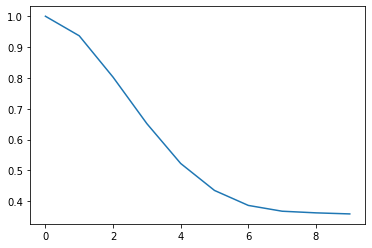

In [9]:
plt.plot(avg)
#plt.yscale('log')
plt.show()

### ドット積の結果をファイルに出力し、読み込む

In [10]:
with open("dot_average.txt", mode='w') as f:
    for num in range(10):       
        f.write(str(num) + " " + str(avg[num])+ "\n")
f.close()
data2 = pd.read_csv("dot_average.txt",sep = " ",header = None, index_col = 0)

### 持続長の定義

In [11]:
def exponential(x,a,b):
    return a*np.exp(-x / b)

### シミュレーション結果を用いて、持続長の公式における最適な係数を求める

In [12]:
popt, pcov = curve_fit(exponential, data2.index.to_numpy(), data2[1])
#poptは最適推定値、pcovは共分散
#curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=- inf, inf, method=None, jac=None, **kwargs)
print(popt[0]) #aの値
print(popt[1]) #bの値

1.0225958401066477
6.914429862724023


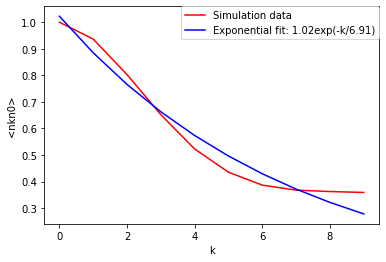

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='k', ylabel='<nkn0>')

ax.plot(data2[1], "r", label = "Simulation data")
ax.plot(exponential(data2.index.to_numpy(),*popt), "b", label = "Exponential fit: " + str(round(popt[0],2)) + "exp(-k/" + str(round(popt[1],2))+ ")")
ax.plot(xlabel='k', ylabel='$<n_k$・$n_0>$')
ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10)
fig.savefig('persistence_sample.png')

### ボクセル の表示

In [14]:
for c in range(0, len(data)):
    x = []
    y = []
    z = []
    for i in range(0, 11):
        x1,y1,z1 = 200.0*data.iloc[c][3*i:3*i+3] #iloc : 複数の要素の値を指定してデータを取り出す
        x.append(x1)
        y.append(y1)
        z.append(z1)
     
    vp.box(pos=vp.vec(x[0],y[0],z[0]), color=vp.color.blue)
    c1,c2,c3 = cm.summer(c/10000.0)[:3]
    t1,t2,t3 = cm.autumn(c/10000.0)[:3]
    
    for j in range(1, 11):
        
        if(j%2==0):
            vp.box(pos=vp.vec(x[j],y[j],z[j]), color=vp.vec(c1,c2,c3))
        else:
            vp.box(pos=vp.vec(x[j],y[j],z[j]), color=vp.vec(t1, t2, t3))
     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>